In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#pip3 install -U scikit-learn go download first!!!

In [2]:
data = pd.read_csv('..\..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data_Numeric_changed = pd.DataFrame(imputer.fit_transform(data_Numeric), columns =data_Numeric.columns)


price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude"]
data_Numeric_changed=data_Numeric_changed.drop(axis=1,columns=useless)


data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032.0,3.0,4.0,1.0,1.0,1.0,85.0,362.5,1375.0,250.0,...,346.0,207.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595.0,6.0,4.0,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,...,291.0,43.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,3308979.0,2.0,11.0,4.5,5.0,7.0,975.0,627.5,2247.5,1000.0,...,220.0,20.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,7421966.0,1.0,3.0,1.0,0.0,2.0,100.0,650.0,2300.0,325.0,...,143.0,0.0,93.0,10.0,10.0,9.5,9.5,9.5,9.0,4.20
4,278830.0,2.0,6.0,2.0,3.0,3.0,450.0,1090.0,3500.0,700.0,...,365.0,38.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


In [3]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test = train_test_split(data_Numeric_changed,test_size = 0.25)
price_Train, price_test = train_test_split(price_changed,test_size = 0.25)
reviewscore_Train, reviewscore_test = train_test_split(reviewscore_changed,test_size = 0.25)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (2863, 27) (2863, 1) (2863, 1)
Test Set  : (955, 27) (955, 1) (955, 1)


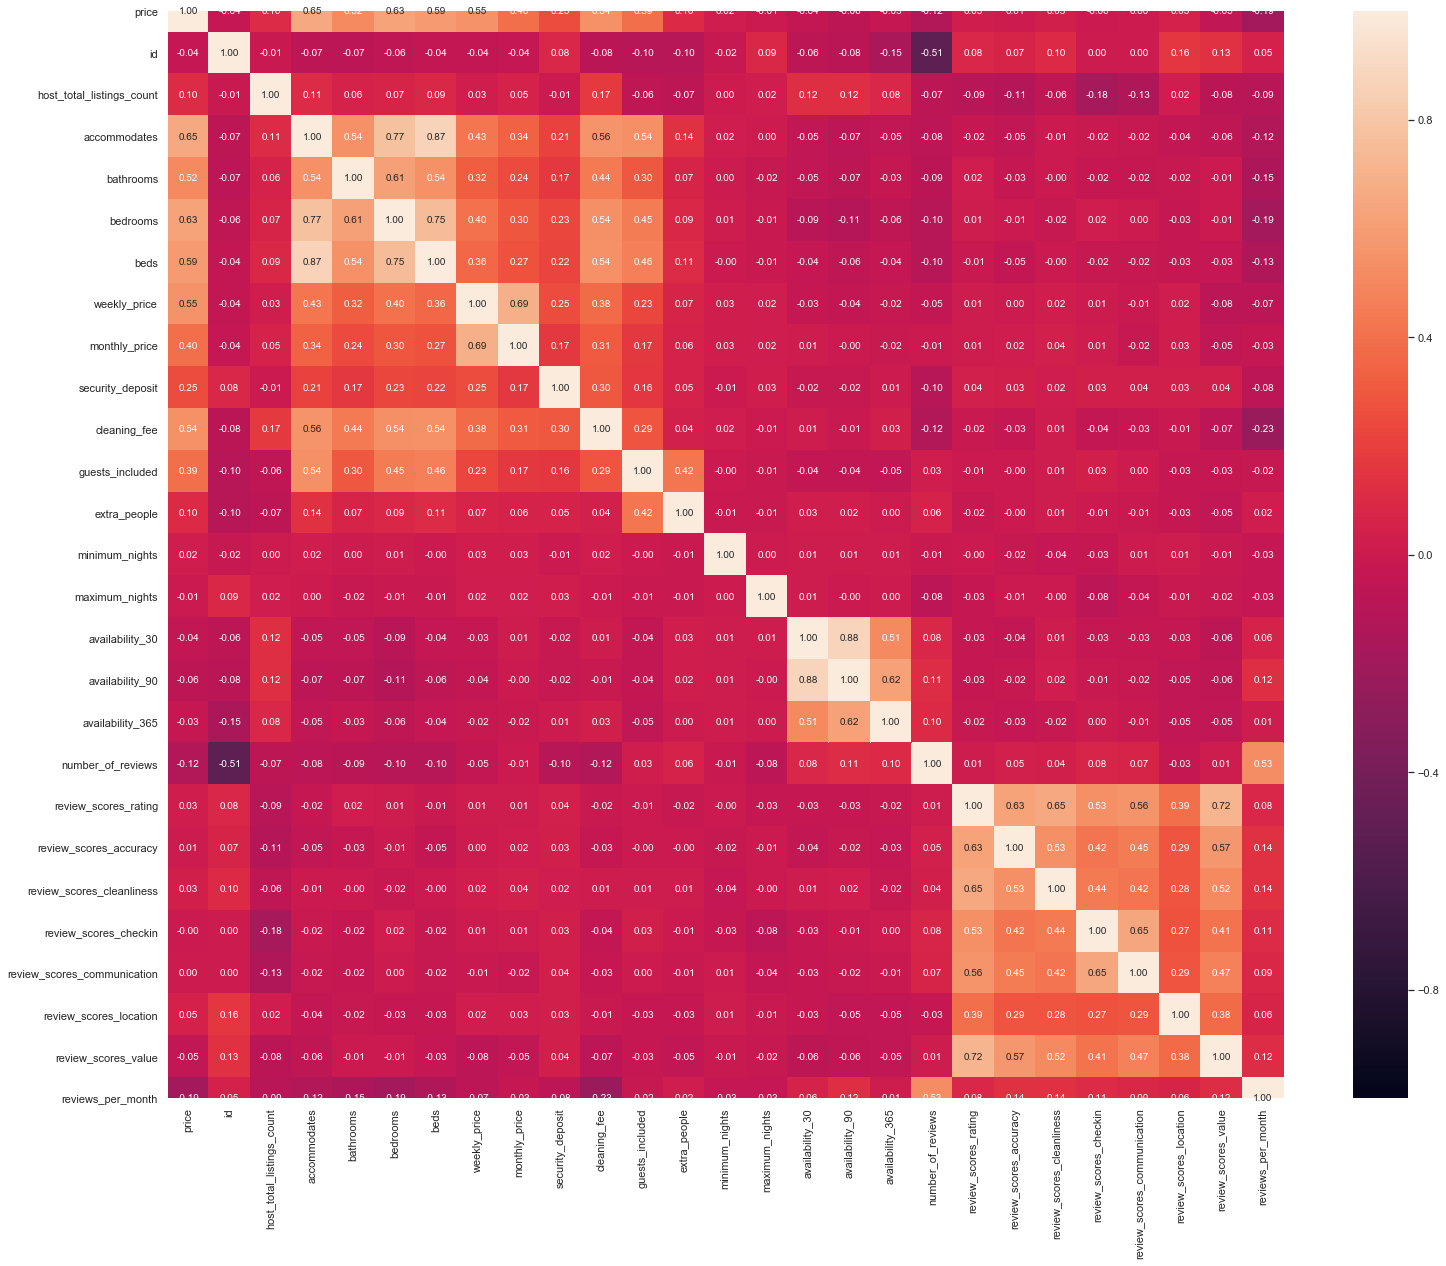

In [4]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [5]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
Multi_High_Related = {}

for var in highrelation:
    Multi_High_Related[index]={}  
    index+=1

index = 0
index2 = 0
for var in Multi_High_Related:
    for var2 in Multi_High_Related:
        Multi_High_Related[index][index2]={}
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0

for var in highrelation:
    for var2 in highrelation:
            for var3 in highrelation:
                    Multi_High_Related[index][index2][index3] = {}
                    index3+=1
            index2+=1
            index3=0
    index+=1
    index2=0


index = 0
index2 = 0
index3 = 0
index4 = 0

for var in highrelation:
    for var2 in highrelation:
        for var3 in highrelation:
                for var4 in highrelation:
                        Multi_High_Related[index][index2][index3][index4] = {}
                        index4+=1
                index4=0
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1


index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in highrelation:
    for var2 in highrelation:
        if(var2!=var):
            for var3 in highrelation:
                if(var3 != var2 and var3 != var):
                    for var4 in highrelation:
                        if(var4!=var3 and var4 != var2 and var4 != var):
                            for var5 in highrelation:
                                if(var5!=var4 and var5!=var3 and var5!=var2 and var5!=var):
                                    Multi_High_Related[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_changed[[var,var2,var3,var4,var5]])
                                    index5+=1
                            index5=0
                            index4+=1
                    index4=0
                    index3+=1
            index3=0
            index2+=1
    index2=0
    index+=1
    



Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

index = 0
for var in highrelation:
    if(index < len(highrelation)):
        Multi_High_Related_Train[index] = {}
        Multi_High_Related_Test[index] = {}
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train:
        Multi_High_Related_Train[index][index2] = {}
        Multi_High_Related_Test[index][index2] = {}
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var2 in Multi_High_Related[var][var2]:
            Multi_High_Related_Train[index][index2][index3] = {}
            Multi_High_Related_Test[index][index2][index3] = {}
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var3 in Multi_High_Related[var][var2]:
                for var4 in  Multi_High_Related[var][var2][var3]:
                    Multi_High_Related_Train[index][index2][index3][index4] = {}
                    Multi_High_Related_Test[index][index2][index3][index4] = {}
                    index4+=1
                index4=0
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

    
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var3 in Multi_High_Related[var][var2]:
            for var4 in  Multi_High_Related[var][var2][var3]:
                for var5 in Multi_High_Related[var][var2][var3][var4]:
                    Multi_High_Related_Train[index][index2][index3][index4][index5] , Multi_High_Related_Test[index][index2][index3][index4][index5] =  train_test_split(Multi_High_Related[index][index2][index3][index4][index5],test_size = 0.25)
                    print("")
                    print("Shape for [",index,"]","[",index2,"][",index3,"][",index4,"][",index5,"]",Multi_High_Related_Train[index][index2][index3][index4][index5].shape, Multi_High_Related_Test[index][index2][index3][index4][index5].shape)
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included

Shape for [ 0 ] [ 0 ][ 0 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 0 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ]

Shape for [ 0 ] [ 1 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 1 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 2 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 2 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 1 ][ 2 ][ 0 ]

Shape for [ 0 ] [ 2 ][ 5 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 2 ][ 5 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 3 ][ 0 ][ 1 ]


Shape for [ 0 ] [ 4 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 2 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 2 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 2 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 2 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 2 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 4 ][ 3 ][ 2 

Shape for [ 0 ] [ 5 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 3 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 0 ] [ 5 ][ 4 ][ 3 ]


Shape for [ 1 ] [ 0 ][ 1 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 1 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 0 ][ 2 ][ 3 


Shape for [ 1 ] [ 1 ][ 3 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 3 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 1 ][ 4 ][ 0 


Shape for [ 1 ] [ 3 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 3 ][ 1 ][ 2 


Shape for [ 1 ] [ 4 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 4 ][ 4 ][ 4 


Shape for [ 1 ] [ 6 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 1 ] [ 6 ][ 1 ][ 4 

Shape for [ 2 ] [ 0 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 0 ][ 4 ][ 4 ]


Shape for [ 2 ] [ 2 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 1 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 2 ][ 2 ][ 0 


Shape for [ 2 ] [ 3 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 4 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 5 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 5 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 3 ][ 5 ][ 0 

Shape for [ 2 ] [ 5 ][ 2 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 2 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 3 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 3 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 3 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 3 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 5 ][ 3 ][ 1 ]


Shape for [ 2 ] [ 6 ][ 5 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 2 ] [ 6 ][ 5 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 0 ][ 0 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 0 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 0 ][ 0 ][ 0 

Shape for [ 3 ] [ 1 ][ 3 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 1 ][ 3 ][ 4 ]


Shape for [ 3 ] [ 3 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 3 ][ 1 ][ 2 

Shape for [ 3 ] [ 4 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 3 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 3 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 4 ][ 4 ][ 3 ]

Shape for [ 3 ] [ 6 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 2 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 3 ] [ 6 ][ 3 ][ 1 ]


Shape for [ 4 ] [ 0 ][ 5 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 0 ][ 5 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 1 ][ 0 ][ 1 

Shape for [ 4 ] [ 2 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 2 ][ 1 ][ 3 ]

Shape for [ 4 ] [ 3 ][ 2 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 3 ][ 2 ][ 4 ]


Shape for [ 4 ] [ 5 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 5 ][ 0 ][ 4 

Shape for [ 4 ] [ 6 ][ 3 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 3 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 4 ] [ 6 ][ 4 ][ 0 ]

Shape for [ 5 ] [ 1 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 1 ][ 1 ][ 4 ]

Shape for [ 5 ] [ 2 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 2 ][ 4 ][ 4 ]

Shape for [ 5 ] [ 4 ][ 2 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 2 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 3 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 3 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 4 ][ 3 ][ 0 ]

Shape for [ 5 ] [ 6 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 5 ] [ 6 ][ 0 ][ 4 ]

Shape for [ 6 ] [ 0 ][ 3 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 0 ][ 3 ][ 4 ]


Shape for [ 6 ] [ 2 ][ 0 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 2 ][ 0 ][ 4 


Shape for [ 6 ] [ 3 ][ 3 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 3 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 3 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 3 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 3 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 3 ][ 4 ][ 3 

Shape for [ 6 ] [ 5 ][ 1 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 1 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 5 ][ 2 ][ 1 ]


Shape for [ 6 ] [ 6 ][ 5 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 6 ] [ 6 ][ 5 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 0 ][ 0 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 0 ][ 0 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 0 ][ 0 ][ 0 

Shape for [ 7 ] [ 1 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 1 ][ 1 ][ 1 ]


Shape for [ 7 ] [ 2 ][ 4 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 2 ][ 4 ][ 4 

Shape for [ 7 ] [ 4 ][ 1 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 1 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 0 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 0 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 1 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 4 ][ 2 ][ 2 ]


Shape for [ 7 ] [ 6 ][ 0 ][ 1 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 1 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 1 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 2 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 2 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 2 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 2 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 3 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 3 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 3 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 3 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 4 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 4 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 4 ][ 2 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 0 ][ 4 ][ 3 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 1 ][ 0 ][ 0 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 1 ][ 0 ][ 1 ] (2863, 5) (955, 5)

Shape for [ 7 ] [ 6 ][ 1 ][ 0 

In [6]:
from sklearn.linear_model import LinearRegression

index = 0
linreg = {}

for var in Multi_High_Related_Train:
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
            linreg[index][index2]={}
            index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var3 in Multi_High_Related[var][var2]:
                linreg[index][index2][index3]={}
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var3 in Multi_High_Related[var][var2]:
            for var4 in Multi_High_Related[var][var2][var3]:
                linreg[index][index2][index3][index4] = {}
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in Multi_High_Related:
    for var2 in Multi_High_Related[var]:
        for var3 in Multi_High_Related[var][var2]:
            for var4 in Multi_High_Related[var][var2][var3]:
                for var5 in Multi_High_Related[var][var2][var3][var4]:
                    linreg[index][index2][index3][index4][index5] = LinearRegression()
                    linreg[index][index2][index3][index4][index5].fit(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1                
    index2=0
    index+=1

In [7]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = {}
        price_test_pred[index][index2] = {}
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in linreg:
    for var2 in linreg[var]:
        for var2 in linreg[var][var2]:
            price_train_pred[index][index2][index3] = {}
            price_test_pred[index][index2][index3] = {}
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                    price_train_pred[index][index2][index3][index4] = {}
                    price_test_pred[index][index2][index3][index4]={}
                    index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                for var5 in linreg[var][var2][var3][var4]:
                    price_train_pred[index][index2][index3][index4][index5] = linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Train[index][index2][index3][index4][index5])
                    price_test_pred[index][index2][index3][index4][index5]=linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Test[index][index2][index3][index4][index5])
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

In [9]:
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        for var3 in price_train_pred[var][var2]:
            for var4 in price_train_pred[var][var2][var3]:
                for var5 in price_train_pred[var][var2][var3][var4]:
                    if(linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)>0.01):
                        print("For [",var,"][",var2,"][",var3,"][",var4,"][",var5,"]")
                        print(Multi_High_Related_Train[index][index2][index3][index4][index5].columns)
                        print("Train Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train))
                        print("Test Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test))
                        print()
                        index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=0